In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from geoscripts import gchemplots as gp

c:\Users\dyvas\miniconda3\envs\dz-caucasus\lib\site-packages\mpltern\ternary\datasets.py:9: UserWarning: `mpltern.ternary.datasets.py` has been moved to `mpltern.datasets.py` and will be removed from the present directory in mpltern 0.6.0.
  warnings.warn(msg)


In [3]:
# Read in organized data
data = pd.read_csv('processed/data.csv',index_col=0)

# Filter for J and mafic
ternary_total = data['Ta']*2+data['Tb']*3+data['Th']
filter_period = (data['Period']=='Jurassic')|(data['Period']=='Jurassic?')
filter_major =  (data['SiO2']<55)
filter_trace = (data['Tb']*3/ternary_total>0.5)
data_filtered = data[filter_period&filter_major&filter_trace]
print(data_filtered.columns)

print(data_filtered['Ta'].min())
print(data_filtered.index,data_filtered['SiO2'],data_filtered['Period'])

Index(['SiO2', 'TiO2', 'Al2O3', 'FeO*', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O',
       'P2O5', 'Ni', 'Cr', 'V', 'Ga', 'Cu', 'Zn', 'La', 'Ce', 'Pr', 'Nd', 'Sm',
       'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Ba', 'Th', 'Nb',
       'Y', 'Hf', 'Ta', 'U', 'Pb', 'Rb', 'Cs', 'Sr', 'Sc', 'Zr', 'Latitude',
       'Longitude', 'Rock_Type', 'Period'],
      dtype='object')
0.1116453911833363
Index(['G22065', 'G22076', 'G22081'], dtype='object') G22065    48.657563
G22076    48.795632
G22081    49.831278
Name: SiO2, dtype: float64 G22065     Jurassic
G22076    Jurassic?
G22081     Jurassic
Name: Period, dtype: object


<TernaryAxes: tlabel='3Tb', llabel='Th', rlabel='2Ta'>

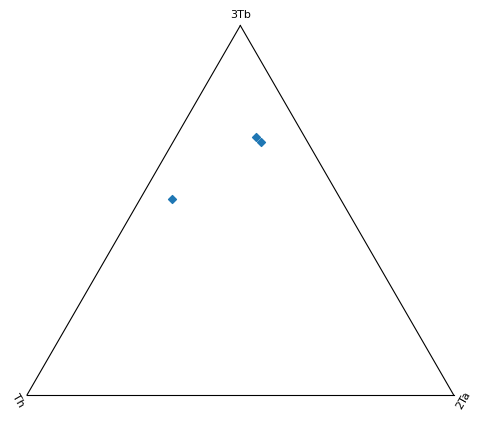

In [4]:
Tb,Th,Ta = data_filtered[['Tb','Th','Ta']].T.values

fig = plt.figure()
ax = fig.add_subplot(111,projection='ternary')
gp.cabanis(Tb,Th,Ta)

4


c:\Users\dyvas\miniconda3\envs\dz-caucasus\lib\site-packages\pyrolite\plot\spider.py:270: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)


4


c:\Users\dyvas\miniconda3\envs\dz-caucasus\lib\site-packages\pyrolite\plot\spider.py:270: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)


<Axes: ylabel='Sample/Primitive Mantle'>

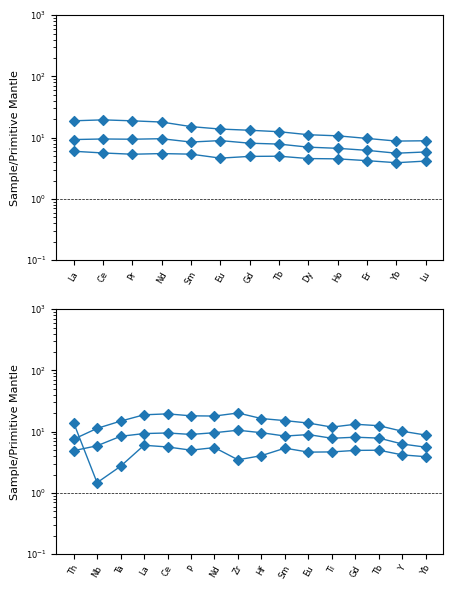

In [5]:
fig,axs = plt.subplots(2,figsize=(5,7))
gp.REE(data_filtered,ax=axs[0])
gp.immobile(data_filtered,ax=axs[1])

4
4


c:\Users\dyvas\miniconda3\envs\dz-caucasus\lib\site-packages\pyrolite\plot\spider.py:270: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)
c:\Users\dyvas\miniconda3\envs\dz-caucasus\lib\site-packages\pyrolite\plot\spider.py:270: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)


<Axes: ylabel='Sample/Primitive Mantle'>

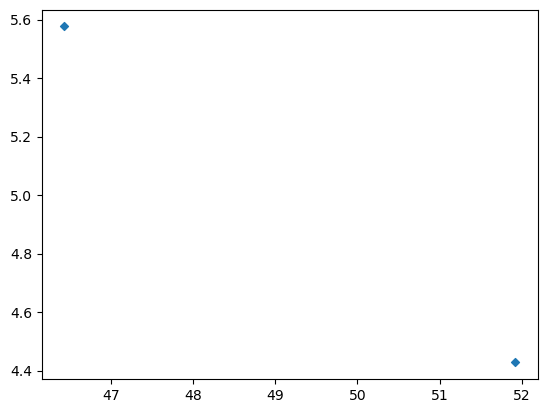

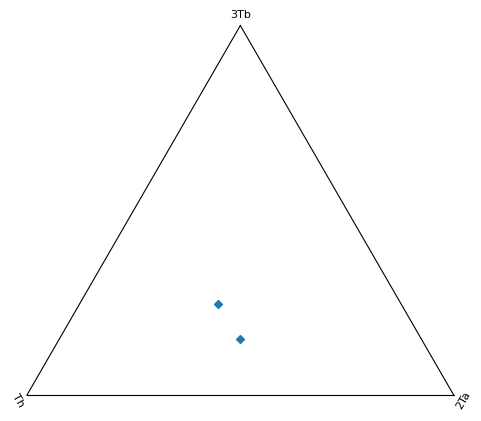

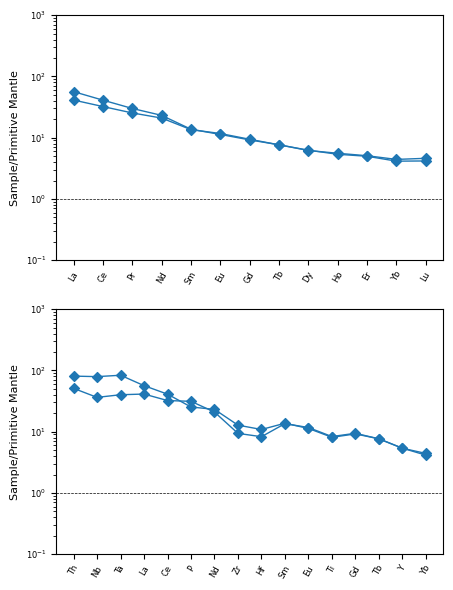

In [14]:
# Look at specific samples

samples = ['G22032A','G22041C']

smp_data = data.loc[samples]

SiO2,Na2O,K2O = smp_data[['SiO2','Na2O','K2O']].T.values
gp.TASsm(SiO2,Na2O,K2O)

Tb,Th,Ta = smp_data[['Tb','Th','Ta']].T.values

fig = plt.figure()
ax = fig.add_subplot(111,projection='ternary')
gp.cabanis(Tb,Th,Ta)

fig2,axs = plt.subplots(2,figsize=(5,7))
gp.REE(smp_data,ax=axs[0])
gp.immobile(smp_data,ax=axs[1])
